## Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import time 

#preprocessing
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

#plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',100000)

## Exploratory Data Analysis

In [2]:
train_df=pd.read_csv('fin_dataset_revised.csv')

In [3]:
train_df.head(5)

,Num,Name,Sex,Age,Visa_type,Job,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Univ_name,Tuition,Traf_fee,Scholar,Online_sh,OTT_Use,Grade,Trip_abroad,Nation,Credit_Score
0,1,Aaron Maashoh,f,23,D2,0,19114.12,1824.843,3,4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,Standard,809.98,26.82262,49.57495,High_spent_Small_value_payments,312.4941,Seoul_National,2013.58,30.120,0,46.874115,1,3.5,2,China,2
1,2,Rick Rothackerj,m,28,H2,1,34847.84,3037.987,2,4,1,Credit-Builder Loan,3,4,5.42,Good,605.03,24.46403,18.81621,Low_spent_Small_value_payments,470.6906,Sungkyunkwan,3216.89,40.470,0,70.603590,2,4.2,2,Japan,1
2,3,Parkm,m,20,D2,0,92047.08,7591.590,6,7,0,NaN,16,13,13.13,Standard,1296.64,28.77694,0.00000,Low_spent_Small_value_payments,782.5740,Yonsei,3220.94,70.372,1,234.772200,3,_,3,German,4
3,4,Nickb,m,20,D2,0,106733.10,8873.428,4,4,0,NaN,5,6,-0.14,Good,76.23,31.72760,0.00000,High_spent_Medium_value_payments,913.0317,Korea,4283.45,90.376,0,273.909510,4,_,4,Australia,1
4,5,Matt Falloonz,m,20,D2,0,72559.36,6284.613,4,5,4,"Home Equity Loan, Mortgage Loan, Credit-Builde...",14,19,2.74,Standard,1173.70,33.16506,215.83920,High_spent_Medium_value_payments,580.1253,Hanyang,3521.24,50.723,1,174.037590,2,_,3,China,4


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num                       100 non-null    int64  
 1   Name                      100 non-null    object 
 2   Sex                       100 non-null    object 
 3   Age                       100 non-null    int64  
 4   Visa_type                 100 non-null    object 
 5   Job                       100 non-null    int64  
 6   Annual_Income             100 non-null    float64
 7   Monthly_Inhand_Salary     100 non-null    float64
 8   Num_Bank_Accounts         100 non-null    int64  
 9   Num_Credit_Card           100 non-null    int64  
 10  Num_of_Loan               100 non-null    int64  
 11  Type_of_Loan              86 non-null     object 
 12  Delay_from_due_date       100 non-null    int64  
 13  Num_of_Delayed_Payment    100 non-null    int64  
 14  Changed_Cre

<AxesSubplot:>

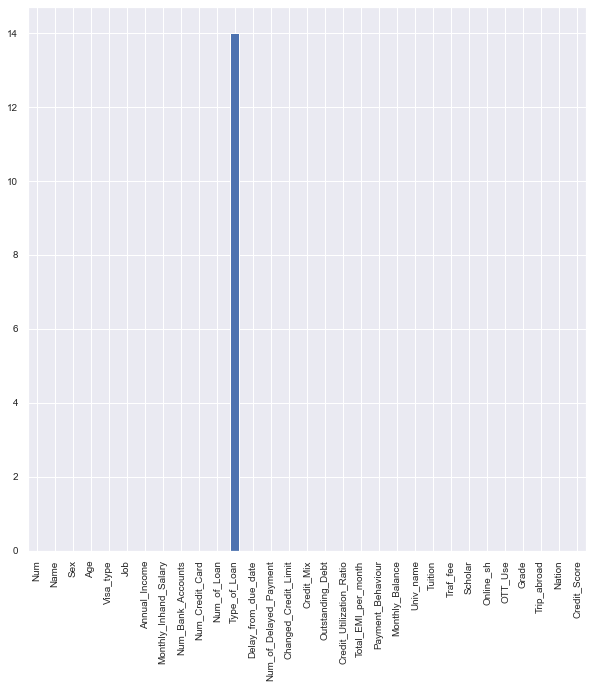

In [5]:
sns.set(rc={'figure.figsize':(10,10)}, font_scale=0.9)
train_df.isna().sum().plot(kind='bar')

In [6]:
train_df.describe(include='object').T

,count,unique,top,freq
Name,100,100,Aaron Maashoh,1
Sex,100,2,m,59
Visa_type,100,5,D2,79
Type_of_Loan,86,68,Student Loan,5
Credit_Mix,100,3,Standard,49
Payment_Behaviour,100,6,Low_spent_Small_value_payments,25
Univ_name,100,17,Kyung_Hee,23
Grade,100,55,_,17
Nation,100,23,China,28


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,100.0,50.500000,29.011492,1.000000,25.750000,50.500000,75.250000,100.000000
Age,100.0,23.610000,2.494013,20.000000,21.000000,24.000000,25.000000,29.000000
Job,100.0,0.230000,0.422953,0.000000,0.000000,0.000000,0.000000,1.000000
Annual_Income,100.0,59399.021150,39633.660598,7912.495000,30253.777500,44238.755000,80604.612500,148699.300000
Monthly_Inhand_Salary,100.0,4969.438711,3295.537593,521.374583,2606.105000,3712.063167,6866.692500,12432.610000
Num_Bank_Accounts,100.0,5.180000,2.471576,0.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100.0,5.470000,2.249377,1.000000,4.000000,5.000000,7.000000,14.000000
Num_of_Loan,100.0,3.440000,2.511871,0.000000,1.000000,4.000000,5.000000,9.000000
Delay_from_due_date,100.0,20.490000,12.861732,1.000000,10.000000,18.500000,27.000000,55.000000
Num_of_Delayed_Payment,100.0,12.120000,7.138288,0.000000,7.000000,12.000000,19.000000,25.000000


In [8]:
# check imbalance data 
train_df['Credit_Score'].value_counts(normalize=True)

1    0.34
3    0.24
5    0.16
2    0.13
4    0.13
Name: Credit_Score, dtype: float64

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

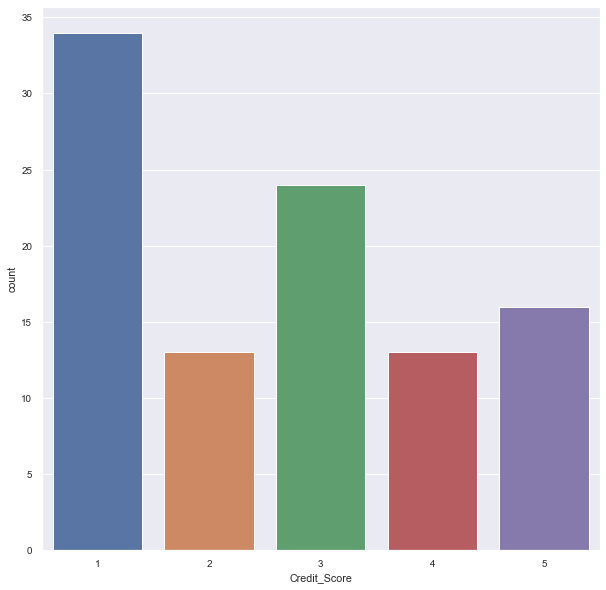

In [9]:
sns.countplot(x=train_df['Credit_Score'])

In [10]:
for col in train_df.columns:
    print(col)
    print(train_df[col].unique()) 
    print('======') 

Num
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Name
['Aaron Maashoh' 'Rick Rothackerj' 'Parkm' 'Nickb' 'Matt Falloonz'
 'Tim Hepherp' 'Bu' 'John McCrankg' 'Charlie Zhur' 'Edwardk' 'Christophd'
 'Mikeh' 'Gellerp' 'Allison Martelly' 'Jenniferu' 'Zhdannikovi' 'Jamiec'
 'Appsq' 'en Klaymant' 'Morganz' 'Frazierm' 'Gillesb' 'Chuck Mikolajczaky'
 'Hudsonl' 'Shupingu' 'Henryu' 'Mike' 'karina' 'Alis' 'Johan' 'Bakerz'
 'Dena Aubing' 'Mark Felsenthalr' 'winter' 'Stempelp' 'Lisa Baertleinu'
 'Daniely' 'Jeanine Preziosor' 'Deepaa' 'Pomeroyi' 'Blenkinsopc'
 'Lisa Baertleink' 'Johno' 'Guillermo Parra-Bernale' 'Dhanya Skariachanm'
 'Ernestc' 'N

## Data Cleaning

In [11]:
# Categorical Cols

categorical_cols=[]
for col in train_df.columns:
    if train_df[col].dtype=='object':
        categorical_cols.append(col) 
categorical_cols

['Name',
 'Sex',
 'Visa_type',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_Behaviour',
 'Univ_name',
 'Grade',
 'Nation']

In [12]:
# replace mistake value with nan as much as possible

for col in categorical_cols:
    train_df[col] = train_df[col].replace({'!@9#%8':'NAN_spent_NAN_value_payments', '#F%$D@*&8':'NAN-00-000','_______':np.nan,'__-333333333333333333333333333__':np.nan,'NM':np.nan,'_':np.nan,'__10000__':np.nan})

In [13]:
# remove _ from some data
strip_list=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment', 'Outstanding_Debt', 'Grade']

for col in strip_list:
    train_df[col]=train_df[col].astype(str).str.strip("_")

In [14]:
train_df['Age'] = train_df['Age'].astype(int)

In [15]:
# Change type  of some features
type_col=['Annual_Income','Monthly_Inhand_Salary','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month', 'Monthly_Balance', 'Tuition', 'Traf_fee', 'Online_sh', 'Grade']

for col in type_col:
    train_df[col]=train_df[col].astype(float)

In [16]:
# Change type  of some features
type_col=['Age','Job','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Scholar', 'OTT_Use', 'Trip_abroad']

for col in type_col:
    train_df[col]=train_df[col].astype(int)

## Feature Engeering

In [17]:
# 나이대별로 나누기

train_df["AgeLevel"]=pd.cut(train_df["Age"],3,labels=["early-20s","mid-20s","late-20s"])

In [18]:
# 소비습관

train_df['New_Payment_Behaviour']=train_df['Payment_Behaviour'].apply(lambda x:x.split('_value_')[0].replace('_spent_',''))

## Preprocessing

In [19]:
# Convert Catogrical Data

from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
enc_list=['Credit_Score', 'Job','Credit_Mix', 'Visa_type', 'AgeLevel','New_Payment_Behaviour']
for col in enc_list:
    train_df[col]=lb.fit_transform(train_df[col])

In [20]:
# Missing values
def display_missing_data(df):
    missing_data = df.isnull().sum().reset_index()
    missing_data = missing_data.rename({'index': 'col', 0: 'null'}, axis=1)
    missing_data['null_percenatage'] = missing_data['null'] / len(df)
    missing_data = missing_data.loc[missing_data['null'] > 0]
    return missing_data

print(display_missing_data(train_df))

             col  null  null_percenatage
11  Type_of_Loan    14              0.14
27         Grade    17              0.17


In [21]:
# calculate   (median, mean,mode) depend on groupby

group_list=['Age','Annual_Income', 'Monthly_Inhand_Salary','Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Monthly_Balance', 'Tuition', 'Traf_fee', 'Online_sh', 'OTT_Use', 'Grade', 'Trip_abroad']

for col3 in group_list:
    
    train_df[col3] = train_df.groupby(['Num'], sort=False)[col3].apply(lambda x: x.fillna(x.median()))

c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepd

In [22]:
group_list2=['Sex','Visa_type','Job','Credit_Mix', 'New_Payment_Behaviour']

for col4 in group_list2:
    
    train_df[col4] = train_df.groupby(['Num'], sort=False)[col4].apply(lambda x: x.fillna(x.mode()[0]))

In [23]:
train_df.drop( axis= 1,columns=['Num','Name','Age','Nation','Payment_Behaviour','Type_of_Loan', 'Univ_name', 'Scholar'],inplace = True)

## Visulaztion

##### 0은 거짓 - (경험이 , 직업이 등) 없다
##### 1은 참 - (경험이, 직업이 등) 있다

<AxesSubplot:ylabel='None'>

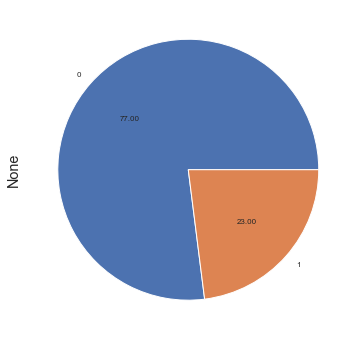

In [24]:
sns.set(rc={'figure.figsize':(6,6)}, font_scale=1.2)
train_df.groupby('Job').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 8})

<AxesSubplot:xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

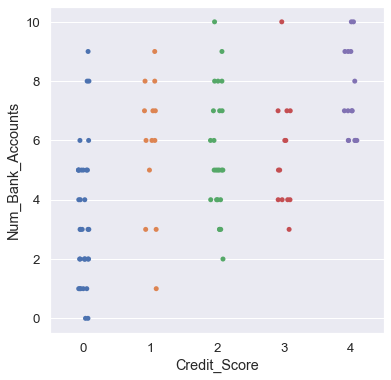

In [25]:
sns.stripplot(x='Credit_Score', y='Num_Bank_Accounts', data=train_df)

<AxesSubplot:xlabel='Credit_Mix', ylabel='Credit_Score'>

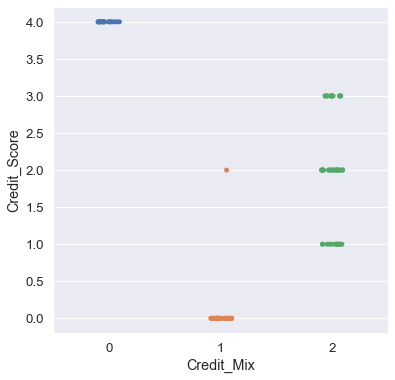

In [26]:
sns.stripplot(x="Credit_Mix",y='Credit_Score', data=train_df)

<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

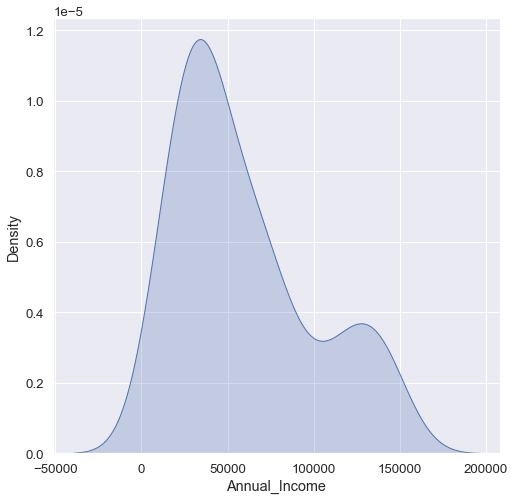

In [27]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2)

sns.kdeplot(train_df['Annual_Income'], shade=True)

<AxesSubplot:ylabel='Monthly_Inhand_Salary'>

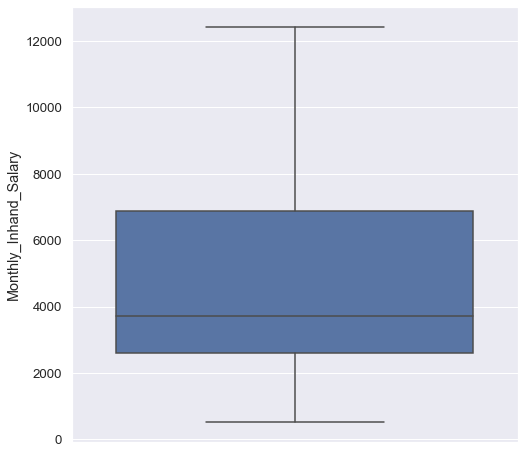

In [28]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=1.2)
sns.boxplot(y='Monthly_Inhand_Salary',data=train_df)

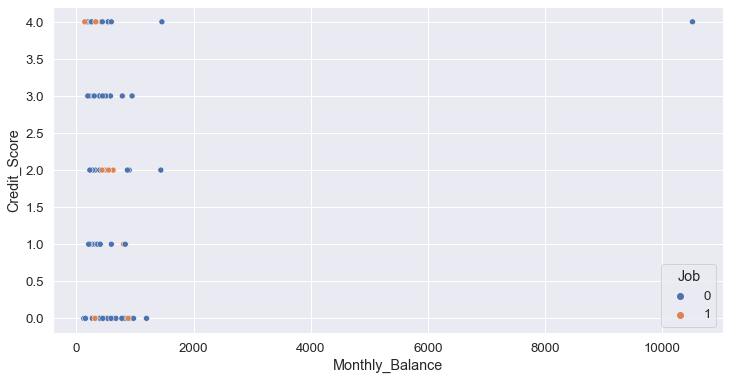

In [29]:
# Bivariate plots

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_df,x='Monthly_Balance',hue='Job',y='Credit_Score')
plt.show()

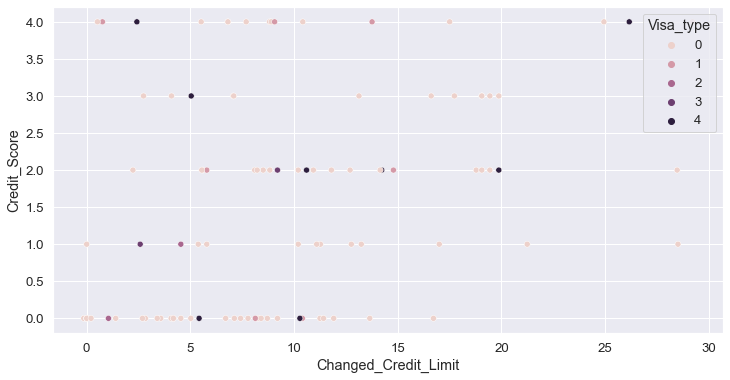

In [30]:
# Bivariate plots

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_df,x='Changed_Credit_Limit',hue='Visa_type',y='Credit_Score')
plt.show()

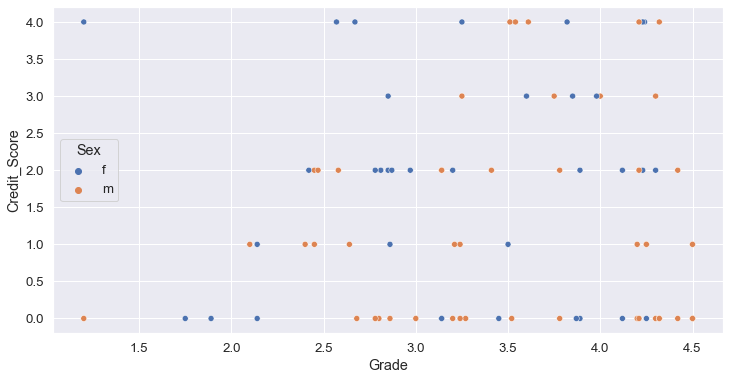

In [31]:
# Bivariate plots

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_df,x='Grade',hue='Sex',y='Credit_Score')
plt.show()

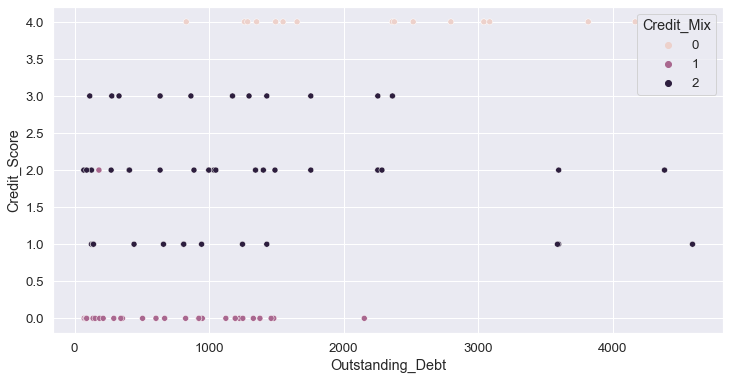

In [32]:
# Bivariate plots

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=train_df,x='Outstanding_Debt',hue='Credit_Mix',y='Credit_Score')
plt.show()

### 확인 작업

In [33]:
train_df

,Sex,Visa_type,Job,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Tuition,Traf_fee,Online_sh,OTT_Use,Grade,Trip_abroad,Credit_Score,AgeLevel,New_Payment_Behaviour
0,f,0,0,19114.12,1824.843,3,4,4,3,7,11.27,2,809.98,26.82262,49.57495,312.4941,2013.58,30.120,46.874115,1,3.50,2,1,0,2
1,m,4,1,34847.84,3037.987,2,4,1,3,4,5.42,1,605.03,24.46403,18.81621,470.6906,3216.89,40.470,70.603590,2,4.20,2,0,1,5
2,m,0,0,92047.08,7591.590,6,7,0,16,13,13.13,2,1296.64,28.77694,0.00000,782.5740,3220.94,70.372,234.772200,3,NaN,3,3,0,5
3,m,0,0,106733.10,8873.428,4,4,0,5,6,-0.14,1,76.23,31.72760,0.00000,913.0317,4283.45,90.376,273.909510,4,NaN,4,0,0,1
4,m,0,0,72559.36,6284.613,4,5,4,14,19,2.74,2,1173.70,33.16506,215.83920,580.1253,3521.24,50.723,174.037590,2,NaN,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,m,0,0,43758.34,3454.528,5,6,2,9,2,4.18,1,1194.28,29.31790,56.31142,319.8823,2365.46,24.140,47.982345,2,4.32,1,0,2,2
96,m,0,0,62320.56,5068.380,9,9,5,26,15,21.24,2,3589.56,32.02054,171.34560,405.8421,3152.34,11.630,60.876315,2,4.25,2,1,1,1
97,m,0,1,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,26.89524,17.69844,436.1262,4536.34,32.870,65.418930,2,3.14,3,2,2,5
98,f,0,0,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,22.01382,17.69844,193.7633,3220.94,42.580,29.064495,0,2.85,0,3,2,5


In [34]:
train_df.drop( axis= 1,columns=['Grade'],inplace = True)

In [35]:
train_df

,Sex,Visa_type,Job,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Tuition,Traf_fee,Online_sh,OTT_Use,Trip_abroad,Credit_Score,AgeLevel,New_Payment_Behaviour
0,f,0,0,19114.12,1824.843,3,4,4,3,7,11.27,2,809.98,26.82262,49.57495,312.4941,2013.58,30.120,46.874115,1,2,1,0,2
1,m,4,1,34847.84,3037.987,2,4,1,3,4,5.42,1,605.03,24.46403,18.81621,470.6906,3216.89,40.470,70.603590,2,2,0,1,5
2,m,0,0,92047.08,7591.590,6,7,0,16,13,13.13,2,1296.64,28.77694,0.00000,782.5740,3220.94,70.372,234.772200,3,3,3,0,5
3,m,0,0,106733.10,8873.428,4,4,0,5,6,-0.14,1,76.23,31.72760,0.00000,913.0317,4283.45,90.376,273.909510,4,4,0,0,1
4,m,0,0,72559.36,6284.613,4,5,4,14,19,2.74,2,1173.70,33.16506,215.83920,580.1253,3521.24,50.723,174.037590,2,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,m,0,0,43758.34,3454.528,5,6,2,9,2,4.18,1,1194.28,29.31790,56.31142,319.8823,2365.46,24.140,47.982345,2,1,0,2,2
96,m,0,0,62320.56,5068.380,9,9,5,26,15,21.24,2,3589.56,32.02054,171.34560,405.8421,3152.34,11.630,60.876315,2,2,1,1,1
97,m,0,1,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,26.89524,17.69844,436.1262,4536.34,32.870,65.418930,2,3,2,2,5
98,f,0,0,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,22.01382,17.69844,193.7633,3220.94,42.580,29.064495,0,0,3,2,5


In [36]:
train_df.fillna(0, inplace=True)

In [37]:
train_df.drop( axis= 1,columns=['Sex'],inplace = True)

In [38]:
train_df

,Visa_type,Job,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Tuition,Traf_fee,Online_sh,OTT_Use,Trip_abroad,Credit_Score,AgeLevel,New_Payment_Behaviour
0,0,0,19114.12,1824.843,3,4,4,3,7,11.27,2,809.98,26.82262,49.57495,312.4941,2013.58,30.120,46.874115,1,2,1,0,2
1,4,1,34847.84,3037.987,2,4,1,3,4,5.42,1,605.03,24.46403,18.81621,470.6906,3216.89,40.470,70.603590,2,2,0,1,5
2,0,0,92047.08,7591.590,6,7,0,16,13,13.13,2,1296.64,28.77694,0.00000,782.5740,3220.94,70.372,234.772200,3,3,3,0,5
3,0,0,106733.10,8873.428,4,4,0,5,6,-0.14,1,76.23,31.72760,0.00000,913.0317,4283.45,90.376,273.909510,4,4,0,0,1
4,0,0,72559.36,6284.613,4,5,4,14,19,2.74,2,1173.70,33.16506,215.83920,580.1253,3521.24,50.723,174.037590,2,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,43758.34,3454.528,5,6,2,9,2,4.18,1,1194.28,29.31790,56.31142,319.8823,2365.46,24.140,47.982345,2,1,0,2,2
96,0,0,62320.56,5068.380,9,9,5,26,15,21.24,2,3589.56,32.02054,171.34560,405.8421,3152.34,11.630,60.876315,2,2,1,1,1
97,0,1,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,26.89524,17.69844,436.1262,4536.34,32.870,65.418930,2,3,2,2,5
98,0,0,27865.26,2606.105,4,3,1,27,18,19.05,2,635.59,22.01382,17.69844,193.7633,3220.94,42.580,29.064495,0,0,3,2,5


### 본격적으로 시작

Feature Selection

In [39]:
#!conda install -c conda-forge -y lightgbm

In [40]:
# Feature Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [41]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek 

In [42]:
X= train_df.drop(['Credit_Score'], axis=1)
Y= train_df['Credit_Score']

In [43]:
X_samp, y_samp = SMOTETomek(random_state=4).fit_resample(X, Y)

In [44]:
# Feature Selection
#from sklearn.feature_selection import f_regression, mutual_info_regression
#from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

all_features = X_samp.columns
all_features

import lightgbm as lgb
#model = XGBRegressor()
#model=RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
model=lgb.LGBMRegressor(num_leaves=50,learning_rate=0.005,n_estimators=40)
#model=RandomForestClassifier(n_estimators=70)

#selector = SelectKBest(k=60, score_func=f_regression)
#selector = SelectKBest(k=40, score_func=mutual_info_regression)
#selector = SelectPercentile(percentile=50, score_func=mutual_info_regression)
selector = SelectFromModel(estimator=model)

selector.fit(X_samp, y_samp)

SelectFromModel(estimator=LGBMRegressor(learning_rate=0.005, n_estimators=40,
                                        num_leaves=50))

In [45]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 6,  7, 10, 14], dtype=int64)

In [46]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Num_of_Loan', 'Delay_from_due_date', 'Credit_Mix', 'Monthly_Balance'], dtype='object')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.3)

## Machine Learning Models

In [48]:
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [49]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [50]:
X_test

,Visa_type,Job,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance,Tuition,Traf_fee,Online_sh,OTT_Use,Trip_abroad,AgeLevel,New_Payment_Behaviour
95,0,0,15023.804195,1116.581811,6,5,4,24,14,18.928817,2,2727.851520,25.498039,33.661028,315.369856,3033.996701,30.120000,47.305478,2,3,0,4
122,0,0,64574.752516,5436.148476,6,7,5,35,22,4.451530,0,1756.296137,27.246747,208.437298,388.206033,6181.435918,34.243085,58.230905,1,1,0,2
87,0,0,17973.495881,1579.955037,5,7,4,20,20,10.369299,2,3157.198269,26.547494,62.181118,224.801182,4406.456232,22.566739,33.720177,1,1,0,4
78,1,0,129335.653536,10754.914375,1,3,4,9,5,4.874199,2,203.047339,32.966803,436.820215,805.484123,3106.683132,78.383358,241.645237,3,3,1,0
129,0,0,19011.913757,1470.876455,6,6,6,39,21,12.412617,0,1422.703523,38.419772,58.530757,206.564433,3302.201785,10.393240,30.984665,0,1,0,4
107,0,0,49223.527266,4153.991075,6,5,4,27,10,16.462599,2,1683.007625,27.499035,114.409735,405.275150,3420.070286,36.341612,60.791273,2,2,1,3
36,0,0,66105.400000,5508.783000,6,8,5,35,23,5.520000,0,1549.560000,28.079200,214.072100,441.466400,5964.560000,40.568000,66.219960,2,2,0,2
111,0,0,27865.260000,2606.105000,4,3,1,27,18,19.050000,2,635.590000,22.013819,17.698443,193.763329,3026.551037,10.431098,29.064499,0,0,2,5
54,0,0,28110.860000,2519.571667,7,8,8,19,22,28.510000,2,4593.310000,29.949064,185.655185,246.106351,6964.340000,11.650000,36.915953,1,3,0,0
31,0,0,39800.120000,3047.677000,7,5,3,17,11,0.000000,2,660.690000,26.019210,58.487660,356.416900,3333.330000,30.230000,53.462535,2,2,1,4


In [51]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "DT": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(n_estimators=5),
    "XGB": XGBClassifier(n_estimators=5),
    "Naive Bayes": GaussianNB(),
    "MLP" : MLPClassifier(),
    "K Means" : KMeans()
}

In [52]:
def acc_score(y_test, y_pred): #정확도를 나타내는 함수
  ac = accuracy_score(y_test, y_pred)
  print(ac)
    
for name, model in models.items():
    print(f'Training Model {name}')
          # \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)[:, 1]
    #print(f'Training Accuracy: {model.score(X_train, y_train)}')
    #print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    #print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(multiclass_roc_auc_score(y_test, y_pred))
    print('-'*30)
    print(classification_report(y_test, y_pred))
    #acc_score(y_test, y_pred)

Training Model LR
0.5224475770100402
------------------------------
              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.00      0.00      0.00        11
           2       0.11      0.11      0.11         9
           3       0.17      0.17      0.17         6
           4       0.35      0.75      0.48         8

    accuracy                           0.23        40
   macro avg       0.17      0.24      0.19        40
weighted avg       0.15      0.23      0.17        40

Training Model KNN
0.7229582578219544
------------------------------
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.62      0.45      0.53        11
           2       0.50      0.11      0.18         9
           3       0.50      0.83      0.62         6
           4       0.55      0.75      0.63         8

    accuracy                           0.53     

c:\program files\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t


------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.78      0.64      0.70        11
           2       0.83      0.56      0.67         9
           3       0.55      1.00      0.71         6
           4       1.00      1.00      1.00         8

    accuracy                           0.80        40
   macro avg       0.83      0.84      0.81        40
weighted avg       0.83      0.80      0.80        40

Training Model RF
0.8655966192052038
------------------------------
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      0.73      0.70        11
           2       0.62      0.56      0.59         9
           3       0.71      0.83      0.77         6
           4       1.00      1.00      1.00         8

    accuracy                           0.78        40
   macro avg       0.80      0.

c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python38\lib\site-packages\sklearn\

0.4967631105598945
------------------------------
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.38      0.27      0.32        11
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.12        40
   macro avg       0.13      0.07      0.09        40
weighted avg       0.21      0.12      0.15        40



c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RF 그래프

In [53]:
'''
위에 있는 내용을 수정해서 
model이 RF을 가리키도록.

아래에서 model부를 때, RF 호출.
'''

'\n위에 있는 내용을 수정해서 \nmodel이 RF을 가리키도록.\n\n아래에서 model부를 때, RF 호출.\n'

In [54]:
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\program files\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


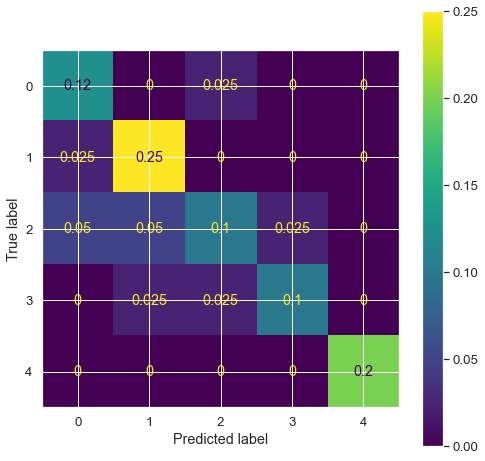

In [55]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, y_pred)

plot_confusion_matrix(model, X_test, y_test, normalize='all') 
# -> 이 부분은 LR 모델로 확정 났으니까, LR의 정확도 나타내는 부분 따로 빼서 model을 LR로 바꿔도 될듯

In [56]:
def prediction ():
  new_input = [0,	0,	34847.840000,	3037.987000,	2,	4,	1,	7,	1,	7.420000,	1,	605.030000,	38.550850,	18.816210,	484.591200,	3216.550000,	40.400000,	72.688680,	2,	5,	1,	0]
  fitted_new_input = np.array([new_input])
  new_predictions = model.predict(fitted_new_input.reshape(1,-1))
  int_array = new_predictions.astype(int)
  for i in int_array:
    return i+1

#### 학습한 모델을 통해 고객데이터의 신용등급을 평가-예측

In [57]:
prediction ()

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

### Flask 사용하여 웹과 연결

In [ ]:
# file name : index.py
# pwd : /project_name/app/main/index.py

from flask import Flask
from flask import Blueprint, request, render_template, flash, redirect, url_for
from flask import current_app as current_app

app = Flask(__name__)

@app.route('/', methods=['GET'])
def index():
    temp = request.args.get('name', "조자용")
    temp1 = request.args.get('juso', prediction ())
 
    return temp + "-" + temp1

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
